In [1]:
import polars as pl

In [2]:
presnap_offense = pl.read_csv("data/outputs/presnap_offense.csv", null_values=["NA"])
presnap_defense = pl.read_csv("data/outputs/presnap_defense.csv", null_values=["NA"])

### Types of Pass Coverage

In [4]:
coverage_counts = (
    presnap_offense.group_by(["gameId", "playId"])
    .agg(pl.col("pff_passCoverage").first().alias("passCoverage"))
    .group_by("passCoverage")
    .agg(pl.len().alias("count"))
    .sort("passCoverage")
)

print(coverage_counts)

shape: (9, 2)
┌──────────────┬───────┐
│ passCoverage ┆ count │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ 2-Man        ┆ 185   │
│ Cover-0      ┆ 605   │
│ Cover-1      ┆ 3353  │
│ Cover-2      ┆ 1850  │
│ Cover-3      ┆ 5660  │
│ Cover-6      ┆ 1382  │
│ Goal Line    ┆ 146   │
│ Quarters     ┆ 2072  │
│ Red Zone     ┆ 536   │
└──────────────┴───────┘


### Types of Offensive Plays

In [5]:
offensive_plays = (
    presnap_defense.group_by(["gameId", "playId"])
    .agg(pl.col("offensivePlay").first().alias("offensivePlay"))
    .group_by("offensivePlay")
    .agg(pl.len().alias("count"))
    .sort("offensivePlay")
)

print(offensive_plays)

shape: (8, 2)
┌────────────────────┬───────┐
│ offensivePlay      ┆ count │
│ ---                ┆ ---   │
│ str                ┆ u32   │
╞════════════════════╪═══════╡
│ PASS_MIDDLE        ┆ 7444  │
│ PASS_OUTSIDE_LEFT  ┆ 465   │
│ PASS_OUTSIDE_RIGHT ┆ 787   │
│ RPO                ┆ 1632  │
│ RUN_INSIDE_LEFT    ┆ 1567  │
│ RUN_INSIDE_RIGHT   ┆ 1578  │
│ RUN_OUTSIDE_LEFT   ┆ 1073  │
│ RUN_OUTSIDE_RIGHT  ┆ 1243  │
└────────────────────┴───────┘


### Number of Presnap Frames per play

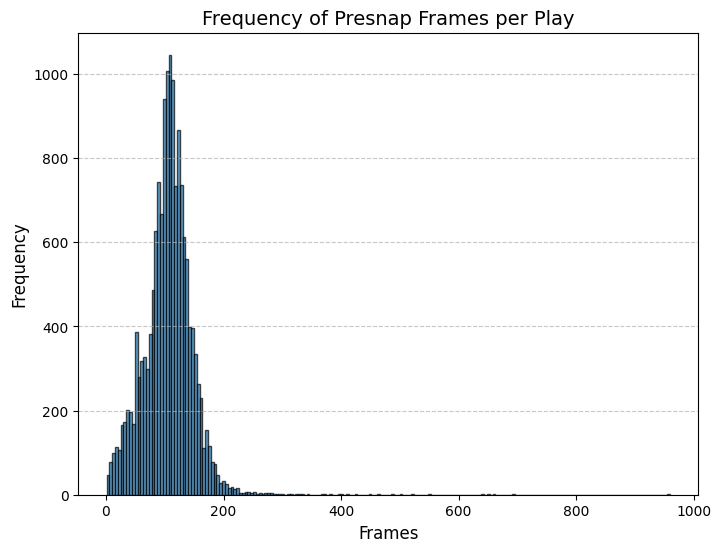

In [31]:
import polars as pl
import matplotlib.pyplot as plt

result = (
    presnap_offense.group_by(["gameId", "playId"])
    .agg(pl.col("frameId").max().alias("max_frameId"))
    .sort(["gameId", "playId"])
)

max_frame_ids = result["max_frameId"].to_pandas()

plt.figure(figsize=(8, 6))
plt.hist(max_frame_ids, bins=200, edgecolor="black", alpha=0.7)
plt.xlabel("Frames", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of Presnap Frames per Play", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
week_offense = presnap_offense.select(pl.col("week") == 1)
week_defense = presnap_defense.select(pl.col("week") == 1)

week_defense.write_csv("data/outputs/presnap_defense_w1.csv")
week_offense.write_csv("data/outputs/presnap_offense_w1.csv")